In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model/Startwars_188.h5
/kaggle/input/model/starwars_188_model1.h5
/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/data-large/d_large.csv
/kaggle/input/data-large/df_large.csv


In [55]:
import matplotlib.pyplot as plt

In [56]:
df_movies = pd.read_csv('/kaggle/input/data-large/df_large.csv')
df_ratings = pd.read_csv('/kaggle/input/data-large/d_large.csv')
ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')  # remove _small
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [57]:
# DataFrame containing movie info
del df_movies['overview']
df_movies.head()

,Unnamed: 0,title,genres,id,popularity,release_date,keywords,actors,director
0,0,Toy Story,"['Animation', 'Comedy', 'Family']",1,21.946943,1995-10-30,"['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']","['tomhanks', 'timallen', 'donrickles', 'jimvarney', 'wallaceshawn', 'johnratzenberger']",['johnlasseter']
1,1,Jumanji,"['Adventure', 'Fantasy', 'Family']",2,17.015539,1995-12-15,"['board game', 'disappearance', ""based on children's book"", 'new home', 'recluse', 'giant insect']","['robinwilliams', 'jonathanhyde', 'kirstendunst', 'bradleypierce', 'bonniehunt', 'bebeneuwirth']",['joejohnston']
2,2,Grumpier Old Men,"['Romance', 'Comedy']",3,11.712900,1995-12-22,"['fishing', 'best friend', 'duringcreditsstinger', 'old men']","['waltermatthau', 'jacklemmon', 'ann-margret', 'sophialoren', 'darylhannah', 'burgessmeredith']",['howarddeutch']
3,3,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",4,3.859495,1995-12-22,"['based on novel', 'interracial relationship', 'single mother', 'divorce', 'chick flick']","['whitneyhouston', 'angelabassett', 'lorettadevine', 'lelarochon', 'gregoryhines', 'dennishaysbert']",['forestwhitaker']
4,4,Father of the Bride Part II,['Comedy'],5,8.387519,1995-02-10,"['baby', 'midlife crisis', 'confidence', 'aging', 'daughter', 'mother daughter relationship', 'pregnancy', 'contraception', 'gynecologist']","['stevemartin', 'dianekeaton', 'martinshort', 'kimberlywilliams-paisley', 'georgenewbern', 'kieranculkin']",['charlesshyer']


In [58]:
# DataFrame containing user ratings
df_ratings.rename(columns = {'id':'MovieId'}, inplace = True)
df_ratings = df_ratings[['userId', 'MovieId', 'title', 'genres', 'keywords', 'rating']]
df_ratings.head()

,userId,MovieId,title,genres,keywords,rating
0,2,10,GoldenEye,"['Adventure', 'Action', 'Thriller']","['cuba', 'falsely accused', 'secret identity', 'computer virus', 'secret base', 'secret intelligence service', 'kgb', 'satellite', 'special car', 'cossack', 'electromagnetic pulse', 'time bomb', 'st. petersburg russia', 'ejection seat', 'red army']",4.0
1,4,10,GoldenEye,"['Adventure', 'Action', 'Thriller']","['cuba', 'falsely accused', 'secret identity', 'computer virus', 'secret base', 'secret intelligence service', 'kgb', 'satellite', 'special car', 'cossack', 'electromagnetic pulse', 'time bomb', 'st. petersburg russia', 'ejection seat', 'red army']",4.0
2,7,10,GoldenEye,"['Adventure', 'Action', 'Thriller']","['cuba', 'falsely accused', 'secret identity', 'computer virus', 'secret base', 'secret intelligence service', 'kgb', 'satellite', 'special car', 'cossack', 'electromagnetic pulse', 'time bomb', 'st. petersburg russia', 'ejection seat', 'red army']",3.0
3,15,10,GoldenEye,"['Adventure', 'Action', 'Thriller']","['cuba', 'falsely accused', 'secret identity', 'computer virus', 'secret base', 'secret intelligence service', 'kgb', 'satellite', 'special car', 'cossack', 'electromagnetic pulse', 'time bomb', 'st. petersburg russia', 'ejection seat', 'red army']",3.0
4,19,10,GoldenEye,"['Adventure', 'Action', 'Thriller']","['cuba', 'falsely accused', 'secret identity', 'computer virus', 'secret base', 'secret intelligence service', 'kgb', 'satellite', 'special car', 'cossack', 'electromagnetic pulse', 'time bomb', 'st. petersburg russia', 'ejection seat', 'red army']",3.0


In [59]:
d = df_ratings

In [60]:
print("Size of ratings dataframe: ",len(ratings), "  Size of movies dataframe: ",len(df_movies))

Size of ratings dataframe:  100004   Size of movies dataframe:  42578


In [61]:
from ast import literal_eval
# To return the first 3 genres
df_movies['genres'] = df_movies['genres'].apply(literal_eval).apply(lambda x : x[0:3])

In [62]:
del df_movies['Unnamed: 0']

In [63]:
# Split the genres to seperate columns
df_movies[['genre1','genre2', 'genre3']] = pd.DataFrame(df_movies.genres.tolist(), index= df_movies.index)
df_movies.head(2)

,title,genres,id,popularity,release_date,keywords,actors,director,genre1,genre2,genre3
0,Toy Story,"[Animation, Comedy, Family]",1,21.946943,1995-10-30,"['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']","['tomhanks', 'timallen', 'donrickles', 'jimvarney', 'wallaceshawn', 'johnratzenberger']",['johnlasseter'],Animation,Comedy,Family
1,Jumanji,"[Adventure, Fantasy, Family]",2,17.015539,1995-12-15,"['board game', 'disappearance', ""based on children's book"", 'new home', 'recluse', 'giant insect']","['robinwilliams', 'jonathanhyde', 'kirstendunst', 'bradleypierce', 'bonniehunt', 'bebeneuwirth']",['joejohnston'],Adventure,Fantasy,Family


In [64]:
# Drop movies that do not have two genre values
n = len(df_movies)
df_movies.dropna(subset = ["genre1", "genre2"], inplace=True)

print("Size of DataFrame after dropping movies that do not have 2 genre valus : ",len(df_movies))
print("Number of movies dropped: ", n - len(df_movies))

Size of DataFrame after dropping movies that do not have 2 genre valus :  27905
Number of movies dropped:  14673


In [65]:
# Map genre1 to integer values
genre1_list = np.unique(df_movies.genre1) 
g1_dict = {k: int(v) for v, k in enumerate(genre1_list)}
g1_dict

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Comedy': 3,
 'Crime': 4,
 'Drama': 5,
 'Family': 6,
 'Fantasy': 7,
 'Foreign': 8,
 'History': 9,
 'Horror': 10,
 'Music': 11,
 'Mystery': 12,
 'Romance': 13,
 'Science Fiction': 14,
 'TV Movie': 15,
 'Thriller': 16,
 'War': 17,
 'Western': 18}

In [66]:
# Map genre2 to integer values
genre2_list = np.unique(df_movies.genre2) 
g2_dict = {k: int(v) for v, k in enumerate(genre2_list)}
g2_dict

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Comedy': 3,
 'Crime': 4,
 'Drama': 5,
 'Family': 6,
 'Fantasy': 7,
 'Foreign': 8,
 'History': 9,
 'Horror': 10,
 'Music': 11,
 'Mystery': 12,
 'Romance': 13,
 'Science Fiction': 14,
 'TV Movie': 15,
 'Thriller': 16,
 'War': 17,
 'Western': 18}

In [67]:
# Replace categorical values of genre with integer values
df_movies = df_movies.replace({"genre1": g1_dict, "genre2": g2_dict})
df_movies.head(2)

,title,genres,id,popularity,release_date,keywords,actors,director,genre1,genre2,genre3
0,Toy Story,"[Animation, Comedy, Family]",1,21.946943,1995-10-30,"['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life']","['tomhanks', 'timallen', 'donrickles', 'jimvarney', 'wallaceshawn', 'johnratzenberger']",['johnlasseter'],2,3,Family
1,Jumanji,"[Adventure, Fantasy, Family]",2,17.015539,1995-12-15,"['board game', 'disappearance', ""based on children's book"", 'new home', 'recluse', 'giant insect']","['robinwilliams', 'jonathanhyde', 'kirstendunst', 'bradleypierce', 'bonniehunt', 'bebeneuwirth']",['joejohnston'],1,7,Family


In [68]:
ratings = ratings.rename(columns={'movieId': 'id'})

In [69]:
# merge ratings and df_movies based on movieid
d = pd.merge(ratings, df_movies, on ='id' )
d.head(2)

,userId,id,rating,timestamp,title,genres,popularity,release_date,keywords,actors,director,genre1,genre2,genre3
0,1,31,2.5,1260759144,Dangerous Minds,"[Drama, Crime]",9.481338,1995-08-11,"['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']","['michellepfeiffer', 'georgedzundza', 'courtneyb.vance', 'robinbartlett', 'johnneville', 'beatricewinde']",['johnn.smith'],5,4,None
1,7,31,3.0,851868750,Dangerous Minds,"[Drama, Crime]",9.481338,1995-08-11,"['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']","['michellepfeiffer', 'georgedzundza', 'courtneyb.vance', 'robinbartlett', 'johnneville', 'beatricewinde']",['johnn.smith'],5,4,None


In [70]:
del ratings
del d['timestamp']
del d['popularity']
del d['release_date']
del d['actors']
del d['director']

In [71]:
# mapping the movieid to continous targets, as there are breaks between ids
t = dict([(y,x) for x,y in enumerate(np.unique(d['id']))])
d['id'] = d['id'].map(t)

In [72]:
# starting userId from 0
d['userId'] = d['userId'] - 1

In [73]:
d.head(2)

,userId,id,rating,title,genres,keywords,genre1,genre2,genre3
0,0,28,2.5,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None
1,6,28,3.0,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None


In [74]:
# Getting the most common movie keywords

import ast
temp =[]
for i in d['keywords']:
    res = ast.literal_eval(i) 
    temp.extend(res)

print(len(temp))

from collections import Counter 
Counter = Counter(temp)
most_occur = Counter.most_common(1500) #1500


927883


In [75]:
# Convert most common keywords to integer values

k = dict([(y[0],x) for x,y in enumerate(most_occur)])
f = []
for i in d['keywords']:
    temp = []
    for j in ast.literal_eval(i):
        if j in k.keys() and len(temp) < 3:
            temp.append(k[j])
            
    f.append(temp)
    
        

In [76]:
d['key'] = f
d.head(2)

,userId,id,rating,title,genres,keywords,genre1,genre2,genre3,key
0,0,28,2.5,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None,"[109, 206, 254]"
1,6,28,3.0,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None,"[109, 206, 254]"


In [77]:
d['key_count'] = d['key'].apply(lambda x: len(x))
print("Size before dropping: ",len(d))
d = d[d['key_count'] >1] # Drop movies that have less than one most common keywords
print("Size of DataFrame after dropping : ",len(d))

Size before dropping:  84964
Size of DataFrame after dropping :  77167


In [78]:
# Create columns based on keyword integer value
d[['key1','key2', 'key3']] = pd.DataFrame(d.key.tolist(), index= d.index)
d.head(2)

,userId,id,rating,title,genres,keywords,genre1,genre2,genre3,key,key_count,key1,key2,key3
0,0,28,2.5,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None,"[109, 206, 254]",3,109,206,254.0
1,6,28,3.0,Dangerous Minds,"[Drama, Crime]","['rap music', 'karate', 'high school', 'naval officer', 'teacher', 'amusement park']",5,4,None,"[109, 206, 254]",3,109,206,254.0


In [79]:
# Map the Keyword values to continous values starting from 0

key_list = np.unique(list(np.unique(d['key1'])) + list(np.unique(d['key2'])))

t = dict([(y,x) for x,y in enumerate(key_list)])

d = d.replace({"key1": t, "key2":t}) 

In [80]:
del d['genre3']
del d['key']
del d['key_count']
del d['key3']
d[d['title']=='The Godfather'].head(3)

,userId,id,rating,title,genres,keywords,genre1,genre2,key1,key2
13256,3,570,5.0,The Godfather,"[Drama, Crime]","['italy', 'love at first sight', 'loss of father', 'patriarch', 'organized crime', 'mafia', 'lawyer', 'italian american', 'crime family', 'rise to power', 'mob boss', '1940s']",5,4,166,150
13257,4,570,2.5,The Godfather,"[Drama, Crime]","['italy', 'love at first sight', 'loss of father', 'patriarch', 'organized crime', 'mafia', 'lawyer', 'italian american', 'crime family', 'rise to power', 'mob boss', '1940s']",5,4,166,150
13258,7,570,5.0,The Godfather,"[Drama, Crime]","['italy', 'love at first sight', 'loss of father', 'patriarch', 'organized crime', 'mafia', 'lawyer', 'italian american', 'crime family', 'rise to power', 'mob boss', '1940s']",5,4,166,150


In [81]:
print("Number of unique movies : ",len(np.unique(d['id'])),"\nNumber of unique users: ", len(np.unique(d['userId'])),"\nTotal Number of enteries in the DataFrame: ", len(d))

Number of unique movies :  5072 
Number of unique users:  671 
Total Number of enteries in the DataFrame:  77167


# **MODEL**

In [82]:
import keras

hidden_units = (32,4)
#movie_embedding_size = 50
#user_embedding_size = 50
m_emb_size = min(len(np.unique(d.id))//2 , 50)
u_emb_size = min(len(np.unique(d.userId))//2 , 50)
g1_emb_size = min(len(np.unique(d.genre1))//2 , 50)
g2_emb_size = min(len(np.unique(d.genre2))//2 , 50)
k1_emb_size = min(len(np.unique(d.key1))//2 , 50)
k2_emb_size = min(len(np.unique(d.key2))//2 , 50)


# Each instance will consist of two inputs: a single user id, and a single movie id
user_id_input = keras.Input(shape=(1,), name='user_id')
movie_id_input = keras.Input(shape=(1,) ,name='movie_id')

g1_id_input = keras.Input(shape = (1,), name='g1_id' )
g2_id_input = keras.Input(shape = (1,), name='g2_id' )

k1_id_input = keras.Input(shape = (1,), name='k1_id' )
k2_id_input = keras.Input(shape = (1,), name='k2_id' )
#director_input = keras


user_embedded = keras.layers.Embedding(d.userId.max()+1, m_emb_size, 
                                       input_length=1, name='user_embedding')(user_id_input)
movie_embedded = keras.layers.Embedding(d.id.max()+1, u_emb_size, 
                                        input_length=1, name='movie_embedding')(movie_id_input)

g1_embedded = keras.layers.Embedding(d.genre1.max()+1, g1_emb_size, 
                                        input_length=1, name='genre1_embedding')(g1_id_input)
g2_embedded = keras.layers.Embedding(d.genre2.max()+1, g2_emb_size, 
                                       input_length=1, name='genre2_embedding')(g2_id_input)

k1_embedded = keras.layers.Embedding(d.key1.max()+1, k1_emb_size, 
                                        input_length=1, name='key1_embedding')(k1_id_input)
k2_embedded = keras.layers.Embedding(d.key2.max()+1, k2_emb_size, 
                                       input_length=1, name='key2_embedding')(k2_id_input)


# Concatenate the embeddings (and remove the useless extra dimension)
concatenated = keras.layers.Concatenate()([user_embedded, movie_embedded, g1_embedded, g2_embedded, k1_embedded, k2_embedded])
out = keras.layers.Flatten()(concatenated)

from keras import backend as K

def custom_activation(x):
    return (K.sigmoid(x) * 6) 

# Add one or more hidden layers
for n_hidden in hidden_units:
    out = keras.layers.Dense(n_hidden, activation='relu')(out)
    out = keras.layers.Dropout(0.2)(out)
    #out = keras.layers.Dense(n_hidden, activation=custom_activation)(out)

# A single output: our predicted rating
out = keras.layers.Dense(1, activation= custom_activation, name='prediction')(out) #'linear'

model2 = keras.Model(
    inputs = [user_id_input, movie_id_input, g1_id_input, g2_id_input, k1_id_input, k2_id_input],
    outputs = out,
)


Model: "functional_1"
________________________________________________________________________________________
Layer (type)                 Output Shape       Param #   Connected to                  
user_id (InputLayer)         [(None, 1)]        0                                       
________________________________________________________________________________________
movie_id (InputLayer)        [(None, 1)]        0                                       
________________________________________________________________________________________
g1_id (InputLayer)           [(None, 1)]        0                                       
________________________________________________________________________________________
g2_id (InputLayer)           [(None, 1)]        0                                       
________________________________________________________________________________________
k1_id (InputLayer)           [(None, 1)]        0                                       

In [83]:
import tensorflow as tf
model2.compile(keras.optimizers.Adam(learning_rate=0.01),
    loss='MSE',
    metrics=['mse', 'mae', 'mape'])

history = model2.fit(
    [d.userId, d.id, d.genre1, d.genre2, d.key1, d.key2],
    d.rating,
    batch_size=2000,
    epochs=100,
    verbose=0,
    validation_split=.1,
)

Epoch 1/100
35/35 - 1s - loss: 0.9309 - mse: 0.9309 - mae: 0.7545 - mape: 31.7992 - val_loss: 1.0605 - val_mse: 1.0605 - val_mae: 0.8001 - val_mape: 44.0885
Epoch 2/100
35/35 - 0s - loss: 0.7874 - mse: 0.7874 - mae: 0.6875 - mape: 28.9548 - val_loss: 1.0807 - val_mse: 1.0807 - val_mae: 0.8037 - val_mape: 44.4706
Epoch 3/100
35/35 - 0s - loss: 0.7543 - mse: 0.7543 - mae: 0.6709 - mape: 28.1901 - val_loss: 1.0845 - val_mse: 1.0845 - val_mae: 0.8055 - val_mape: 44.4565
Epoch 4/100
35/35 - 0s - loss: 0.7328 - mse: 0.7328 - mae: 0.6608 - mape: 27.6314 - val_loss: 1.0960 - val_mse: 1.0960 - val_mae: 0.8089 - val_mape: 44.4602
Epoch 5/100
35/35 - 0s - loss: 0.7180 - mse: 0.7180 - mae: 0.6531 - mape: 27.3112 - val_loss: 1.0948 - val_mse: 1.0948 - val_mae: 0.8107 - val_mape: 44.1923
Epoch 6/100
35/35 - 0s - loss: 0.7046 - mse: 0.7046 - mae: 0.6459 - mape: 26.8359 - val_loss: 1.1042 - val_mse: 1.1042 - val_mae: 0.8122 - val_mape: 44.2722
Epoch 7/100
35/35 - 0s - loss: 0.6895 - mse: 0.6895 - mae:

Epoch 53/100
35/35 - 0s - loss: 0.4761 - mse: 0.4761 - mae: 0.5216 - mape: 20.3620 - val_loss: 1.1483 - val_mse: 1.1483 - val_mae: 0.8317 - val_mape: 44.4673
Epoch 54/100
35/35 - 0s - loss: 0.4695 - mse: 0.4695 - mae: 0.5189 - mape: 20.1841 - val_loss: 1.1504 - val_mse: 1.1504 - val_mae: 0.8307 - val_mape: 44.7677
Epoch 55/100
35/35 - 0s - loss: 0.4699 - mse: 0.4699 - mae: 0.5187 - mape: 20.2904 - val_loss: 1.1572 - val_mse: 1.1572 - val_mae: 0.8360 - val_mape: 44.4195
Epoch 56/100
35/35 - 0s - loss: 0.4709 - mse: 0.4709 - mae: 0.5180 - mape: 20.2382 - val_loss: 1.1552 - val_mse: 1.1552 - val_mae: 0.8361 - val_mape: 44.7281
Epoch 57/100
35/35 - 0s - loss: 0.4664 - mse: 0.4664 - mae: 0.5160 - mape: 20.0428 - val_loss: 1.1560 - val_mse: 1.1560 - val_mae: 0.8364 - val_mape: 44.5866
Epoch 58/100
35/35 - 0s - loss: 0.4699 - mse: 0.4699 - mae: 0.5166 - mape: 20.2201 - val_loss: 1.1497 - val_mse: 1.1497 - val_mae: 0.8363 - val_mape: 44.3828
Epoch 59/100
35/35 - 0s - loss: 0.4646 - mse: 0.4646

In [84]:
# Using Saved Model

from keras import backend as K

def custom_activation(x):
    return (K.sigmoid(x) * 6) 

from keras.models import load_model

# To load the model
custom_objects={'custom_activation': custom_activation}

# To load a persisted model that uses the CRF layer 
model2 = load_model("/kaggle/input/model/Startwars_188.h5", custom_objects = custom_objects)



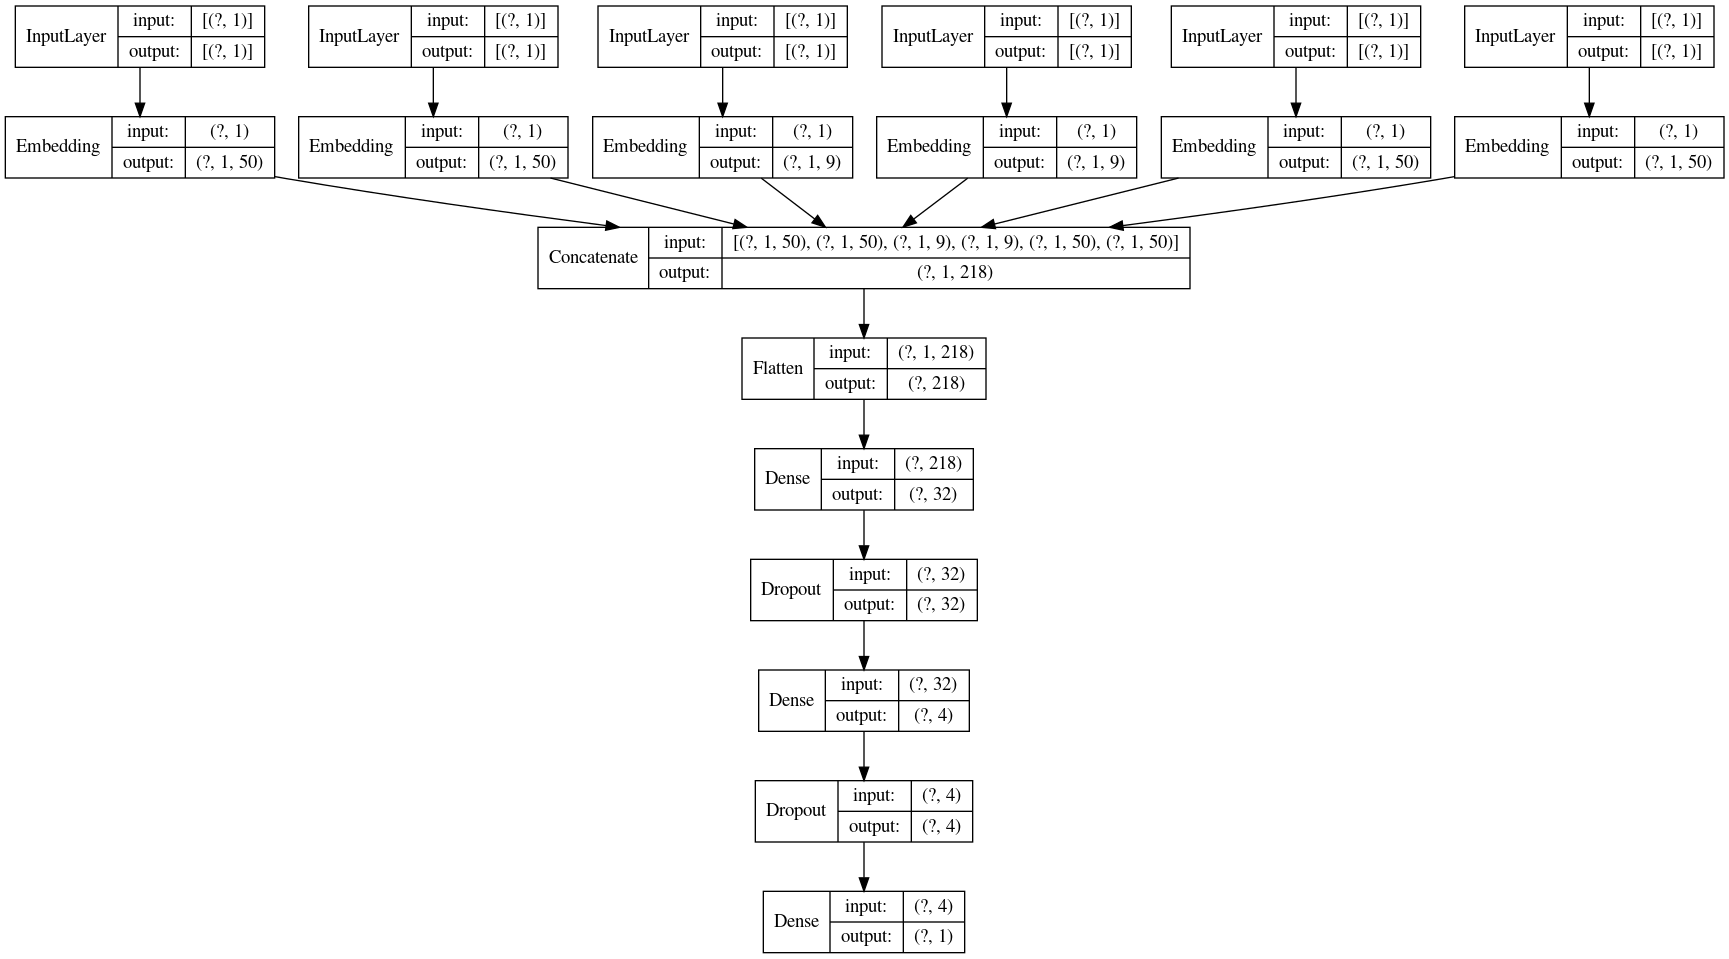

In [85]:
import tensorflow as tf
tf.keras.utils.plot_model(model2, to_file='Embedding_Model.png', show_shapes=True, show_layer_names=False)
from IPython.display import Image
Image(retina=False, filename='Embedding_Model.png')

# **MODEL PERFORMANCE**

In [86]:

X = d[['userId', 'id', 'genre1','genre2', 'rating', 'key1','key2']]
y = d['rating']

X['pred'] = model2.predict([[X['userId']], [X['id']],[X['genre1']],[X['genre2']], [X['key1']], [X['key2']]])

X['diff'] = abs(X['rating'] - X['pred'])
X.head()

,userId,id,genre1,genre2,rating,key1,key2,pred,diff
0,0,28,5,4,2.5,105,196,2.426450,0.073550
1,6,28,5,4,3.0,105,196,2.624849,0.375151
2,30,28,5,4,4.0,105,196,3.895103,0.104897
3,31,28,5,4,4.0,105,196,3.857727,0.142273
4,35,28,5,4,3.0,105,196,2.846988,0.153012


In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_true = X.rating.values, y_pred = X.pred.values )
MAE = mean_absolute_error(y_true = X.rating.values, y_pred = X.pred.values )

print("MEAN SQUARED ERROR : ", MSE, "\nROOT MEAN SQUARED ERROR : ", MSE**(0.5), "\nMEAN ABSOLUTE ERROR : ", MAE)

MEAN SQUARED ERROR :  0.3872670665814989 
ROOT MEAN SQUARED ERROR :  0.6223078551500848 
MEAN ABSOLUTE ERROR :  0.4490021042568154


In [88]:
# Movie Embedding Vector
emb_layer = model2.get_layer('movie_embedding')
(w,) = emb_layer.get_weights()
w[0]

array([-0.2292184 ,  0.21288668,  0.00164188, -0.9330383 , -0.80550015,
        0.51927394,  0.38410345, -0.46484247,  0.19394027,  0.19774391,
        0.5549032 , -0.34806055,  0.17985347, -0.5392994 , -0.44038922,
        0.05652573,  0.6450074 , -0.09839974,  0.3100575 , -0.33098343,
       -0.42991647, -0.2055828 , -0.48824182, -0.7278157 , -0.42687523,
        0.27199808, -0.19020359, -0.59091175, -0.16681497,  1.0012896 ,
       -0.9130538 ,  0.45721903, -0.42295393, -1.0145091 , -0.03957133,
        0.45113572, -0.2722873 , -0.4303799 ,  0.31355554,  0.69537866,
       -0.4123748 ,  1.0384799 ,  0.84968585,  0.34534046,  0.09384055,
       -0.07773213,  0.42348164, -0.22527339, -0.70121837,  0.53747666],
      dtype=float32)

# **Recommendations**

In [89]:
!pip install nmslib
import nmslib

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [90]:
# Searching in Embedding Space

movies_index = nmslib.init(space='angulardist', method='hnsw')
movies_index.addDataPointBatch(model2.get_layer('movie_embedding').get_weights()[0])

user_index = nmslib.init(space='angulardist', method='hnsw')
user_index.addDataPointBatch(model2.get_layer('user_embedding').get_weights()[0])

M = 100
efC = 1000
efS = 1000
num_threads = 6
index_time_params = {'M': M, 'indexThreadQty': num_threads, 'efConstruction': efC, 'post' : 0}
query_time_params = {'efSearch': efS}

movies_index.createIndex(index_time_params)
movies_index.setQueryTimeParams(query_time_params)

user_index.createIndex(index_time_params)
user_index.setQueryTimeParams(query_time_params)

def get_knns(index, vecs, n_neighbour):
     return zip(*index.knnQueryBatch(vecs, k=n_neighbour, num_threads=6))

def get_knn(index, vec, n_neighbour):
    return index.knnQuery(vec, k=n_neighbour)

def suggest_movies_knn(movieId, n_suggest = 5):
    id = movieId
    res = get_knn(movies_index, model2.get_layer("movie_embedding").get_weights()[0][movieId], n_suggest)[0]
    #return df_main[df_main.id.isin([idx2movie[i] for i in res])]
    return res
    
def suggest_users_knn(userId, n_suggest = 5):
    i = userId
    res = get_knn(user_index, model2.get_layer("user_embedding").get_weights()[0][userId], n_suggest)[0]
    #return df_main[df_main.id.isin([idx2movie[i] for i in res])]
    return res

In [91]:
d[d['title']=='Star Wars'].head(1)

,userId,id,rating,title,genres,keywords,genre1,genre2,key1,key2
12026,3,188,5.0,Star Wars,"[Adventure, Action, Science Fiction]","['android', 'galaxy', 'hermit', 'death star', 'lightsaber', 'jedi', 'rescue mission', 'empire', 'rebellion', 'planet', 'smuggler', 'the force', 'space opera', 'galactic war', 'stormtrooper', 'totalitarianism']",1,0,48,232


In [92]:
# Recommendations for Star Wars
movie_id = 188 # 188 --> Star Wars
j = suggest_movies_knn(movie_id, 8)
print(" Recommended Movies based on Movie Embedding are : \n",list(np.unique(d[d['id'].isin(j)]['title'])))

 Recommended Movies based on Movie Embedding are : 
 ['Before Sunset', 'Return of the Jedi', 'Star Wars', 'The Dark Knight', 'The Empire Strikes Back', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Two Towers']


In [93]:
d[d['title']=='The Lord of the Rings: The Fellowship of the Ring'].head(1)

,userId,id,rating,title,genres,keywords,genre1,genre2,key1,key2
31564,7,3087,3.5,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]","['elves', 'dwarves', 'orcs', 'middle-earth (tolkien)', 'hobbit', 'based on novel', 'mountain', 'fireworks', 'castle', 'volcano', 'password', 'death of a friend', 'uncle', 'mirror', 'wizard', 'sword and sorcery']",1,7,186,605


In [94]:
movie_id = 3087 # 3087 --> The Lord of the Rings: The Fellowship of the Ring
j = suggest_movies_knn(movie_id, 8)
print(" Recommended Movies based on Movie Embedding are : \n",list(np.unique(d[d['id'].isin(j)]['title'])))

 Recommended Movies based on Movie Embedding are : 
 ['Gladiator', 'Return of the Jedi', 'Star Trek', 'Star Wars', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Two Towers', 'The Matrix']


In [95]:
d[(d['userId']==288) & (d['rating']>4)]

,userId,id,rating,title,genres,keywords,genre1,genre2,key1,key2
14016,288,697,4.5,The Fox and the Hound,"[Adventure, Animation, Drama]","['based on novel', 'fox', 'friendship', 'dog', 'animal', 'hunting', 'unlikely friendship']",1,2,0,6
35773,288,1685,5.0,10 Things I Hate About You,"[Comedy, Romance, Drama]","['shakespeare', 'sister', 'high school', 'cannabis', 'deception', 'teen movie', 'shrew', 'archery', 'feel-good ending', 'opposites attract', 'duringcreditsstinger', 'teenage romance', 'play adaptation', 'overprotective father']",3,13,410,625
36167,288,5653,4.5,(500) Days of Summer,"[Comedy, Drama, Romance]","['date', 'sex', 'jealousy', 'fight', 'architect', 'gallery', 'interview', 'sister', 'party', 'love', 'friends', 'fate', 'los angeles', 'summer', 'ikea', 'year', 'heartache']",3,5,44,54
53160,288,4086,4.5,13 Going on 30,"[Comedy, Fantasy, Romance]","['new york', 'photographer', 'editor-in-chief', 'wish', 'michael jackson', 'child as an adult', 'best friends in love']",3,7,27,373
73919,288,1385,4.5,An American Tail: Fievel Goes West,"[Adventure, Animation, Family]","['sheriff', 'indian territory', 'mouse', 'family']",1,2,366,569


In [96]:
# Recommend similar profiles
user_id = 288
j = suggest_users_knn(user_id, 5)
print(" Recommended Users based on user Embedding are : \n",list(np.unique(d[d['userId'].isin(j)]['userId']))[:10])

 Recommended Users based on user Embedding are : 
 [69, 111, 288, 465, 652]


In [97]:
# Recommendations Based on User Profile #288
user_id = 288
user_profile = d[d['userId'] == user_id]  
user_profile = user_profile[['userId', 'id', 'title', 'genre1', 'genre2', 'key1', 'key2', 'rating', 'genres']]
user_profile = user_profile[user_profile['rating']>4]
user_profile # User Profile of user 288

,userId,id,title,genre1,genre2,key1,key2,rating,genres
14016,288,697,The Fox and the Hound,1,2,0,6,4.5,"[Adventure, Animation, Drama]"
35773,288,1685,10 Things I Hate About You,3,13,410,625,5.0,"[Comedy, Romance, Drama]"
36167,288,5653,(500) Days of Summer,3,5,44,54,4.5,"[Comedy, Drama, Romance]"
53160,288,4086,13 Going on 30,3,7,27,373,4.5,"[Comedy, Fantasy, Romance]"
73919,288,1385,An American Tail: Fievel Goes West,1,2,366,569,4.5,"[Adventure, Animation, Family]"


In [98]:
# Finding the average movie embedding to capture user interests.
avg_w = 0
for i in user_profile.id:
    avg_w += w[i]
avg_w = avg_w/len(user_profile)    

In [99]:
# Recommending movies based on average movie embedding
j= get_knn(movies_index, avg_w , 5)[0]
print(" Recommended Movies based on Movie Embedding are : \n",list(np.unique(d[d['id'].isin(j)]['title'])))

 Recommended Movies based on Movie Embedding are : 
 ['13 Going on 30', 'Sleepless in Seattle', 'Syriana', 'The Mirror Has Two Faces', 'The Notebook']
